# Part 2 - Shortest Path Algorithms

## 1.0 Introduction

In this part of the assignment we will be exploring a few algorithms for graph traversal, namely those for identifying the shortest path in a graph based on weights of edges between nodes. To gain a thorough understanding of graphs and the algorithms, we will first trace the algorithms manually; then implement them ourselves, defining a class for a graph, as well as for the search algorithms we will explore; and then lastly verify the results using the NetworkX module. The algorithms we will be exploring are Dijkstra's Shortest Path Algorithm, and A* Shortest Path Algorithm, and the notebook will be outlined as follows:

- **Dijkstra's Shortest Path Algorithm**  
    - Pen and Paper Implementation
    - Student Python Implementation
    - NetworkX Implementation
<br>
- **A\* Shortest Path Algorithm**
    - Pen and Paper Implementation
    - Student Python Implementation
    - NetworkX Implementation

### Constructing the Graphs

The first thing we will need to do to experiment with the shortest path algorithms is to define the graph that we will be attempting to traverse. We will be graph_path_testing the two algorithms with two different graph implementations, so we need to define the graphs using the two implementations. One will be using our own version of a Graph class, defined in the accompanying graph.py module. The other will be using the NetworkX library.

In [1]:
# Python Module Imports
import math
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image, display
import os

# Student Module Imports
import networkX_util as nxu
from graph import Graph
from shortest_path import Dijkstra, A_Star
import graph_path_testing

#### Defining the Graph using our own Graph Implementation
The following part of the code uses our own implementation of the Graph class to define the graph. The implementation can be found in the accompanying graph.py file. We define all of the edges in the graph with their corresponding nodes (which will be added if they do not already exist in the graph) and weights. We also define the position of the nodes of the graph, which will be used for the implementation of the A* shortest path algorithm later.

As an aside, a set of unit tests has also been defined to verify the standard operations that a graph should have. The unit test sets up an empty graph and a graph with t nodes and 5 edges, and tests the .is_empty, num_nodes, num_edges properties, as well as the neighbors(node) and adjacent(node1, node2) methods. The tests themselves are defined in the module unitTest.py and run at the bottom of the notebook.

In [2]:
my_graph = Graph()

# Draw all of the edges
my_graph.add_edge('A','B',5)
my_graph.add_edge('A','H',8)
my_graph.add_edge('A','E',9)
my_graph.add_edge('B','H',12)
my_graph.add_edge('B','C',12)
my_graph.add_edge('B','D',15)
my_graph.add_edge('C','D',3)
my_graph.add_edge('C','H',7)
my_graph.add_edge('C','G',11)
my_graph.add_edge('C','F',1)
my_graph.add_edge('D','G',9)
my_graph.add_edge('E','H',5)
my_graph.add_edge('E','F',4)
my_graph.add_edge('E','G',20)
my_graph.add_edge('F','G',13)
my_graph.add_edge('F','H',6)

# Add position data to each node
my_graph.get_node('A').add_data('pos', (7.5, 44))
my_graph.get_node('B').add_data('pos', (35, 57))
my_graph.get_node('C').add_data('pos', (64.75, 41))
my_graph.get_node('D').add_data('pos', (86.25, 56.5))
my_graph.get_node('E').add_data('pos', (12.25, 5.25))
my_graph.get_node('F').add_data('pos', (55.75, 20.25))
my_graph.get_node('G').add_data('pos', (92.5, 6.25))
my_graph.get_node('H').add_data('pos', (32.25, 32.75))


#### Defining the Graph using NetworkX Implementation
The following code defines the same exact graph using NetworkX's implementation. This time, we first define the nodes with their positions, before adding all of the edges to the graph with their corresponding weights. One nice feature of NetworkX is that it provides visual representations of the graph, allowing us to see the nodes and connections and verify that the graph has been constructed properly.

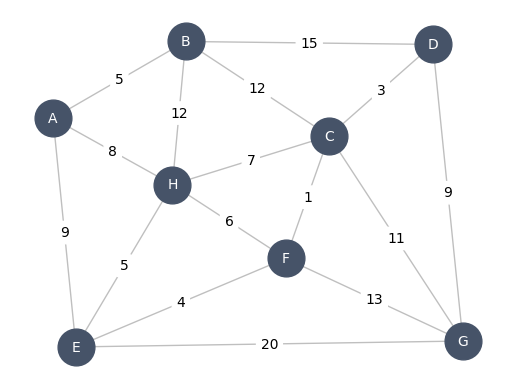

In [3]:
nxx_graph = nx.Graph()

# Draw nodes at (x,y positions)
nxx_graph.add_node('A', pos=(7.5, 44))
nxx_graph.add_node('B', pos=(35, 57))
nxx_graph.add_node('C', pos=(64.75, 41))
nxx_graph.add_node('D', pos=(86.25, 56.5))
nxx_graph.add_node('E', pos=(12.25, 5.25))
nxx_graph.add_node('F', pos=(55.75, 20.25))
nxx_graph.add_node('G', pos=(92.5, 6.25))
nxx_graph.add_node('H', pos=(32.25, 32.75))

# Draw edges between nodes
nxx_graph.add_edge('A','B', weight=5)
nxx_graph.add_edge('A','H', weight=8)
nxx_graph.add_edge('A','E', weight=9)
nxx_graph.add_edge('B','H', weight=12)
nxx_graph.add_edge('B','C', weight=12)
nxx_graph.add_edge('B','D', weight=15)
nxx_graph.add_edge('C','D', weight=3)
nxx_graph.add_edge('C','H', weight=7)
nxx_graph.add_edge('C','G', weight=11)
nxx_graph.add_edge('C','F', weight=1)
nxx_graph.add_edge('D','G', weight=9)
nxx_graph.add_edge('E','H', weight=5)
nxx_graph.add_edge('E','F', weight=4)
nxx_graph.add_edge('E','G', weight=20)
nxx_graph.add_edge('F','G', weight=13)
nxx_graph.add_edge('F','H', weight=6)

# Set the pos attribute to the position of each of the nodes
pos = nx.get_node_attributes(nxx_graph, 'pos')

# Draw the nodes
nx.draw_networkx_nodes(nxx_graph, pos, node_size=700, node_color='#465368')
nx.draw_networkx_labels(nxx_graph, pos, labels={node: node for node in nxx_graph.nodes()}, font_color='white', font_size=10, font_family="sans-serif")

# Draw the edges
nx.draw_networkx_edges(nxx_graph, pos, alpha=0.5, edge_color="gray")
edge_labels = nx.get_edge_attributes(nxx_graph, "weight")
nx.draw_networkx_edge_labels(nxx_graph, pos, edge_labels, rotate=False)

plt.axis("off")
plt.show()

## 2.0 Dijkstra's Algorithm

### **2.1 The Algorithm**

Dijkstra's shortest path finding algorithm is perhaps the most well known algorithm for finding the shortest path between nodes. It uses meta-data about the edges, known as weights, to represent the desirability of a specific edge and uses them to come up with the path with the least amount of weight to traverse. These are often implemented in networks, where weights can represent bandwidth, traffic, congestion, length, etc. and helps to determine optimal path for packets to take to reach a client to a server on the network. The algorithm works on the basis of a Priority Queue (which is not technically a queue in the strictest sense since it doesn't follow FIFO), which it uses to determine which node to search from next. For this reason, it is not necessarily a breadth-first or depth-first algorithm, since it selects the next node to unpack based on position in the queue. It looks at all of the unvisited nodes of the node it is currently searching from, determines the length of the path to these nodes via the current node, and re-sorts the priority queue based on the minimum distance to each of the nodes. By the time it searches from the end node, it should have found the shortest path.

#### Pseudocode
***
**Algorithm 1:** Dijkstra's Algorithm for Finding the Shortest Path Between 2 Nodes
***
**Function:** shortest_path(G, s, e)  
**Input:** *G*, a graph, *s*, a start point, and *e*, and end point  
**Output:** the shortest path between a and e  
<span style="font-size:10px;">1:</span> $priority\_queue$ ← $0$ for $s$, $∞$ for all other nodes  
<span style="font-size:10px;">2:</span> $visited ←$ empty list  
<span style="font-size:10px;">3:</span> $current ← a$  
<span style="font-size:10px;">4:</span> **while** $current ≠ e$  
<span style="font-size:10px;">5:        </span> $unvisited\_neighbors ← neighbors\_of\_current - visited$  
<span style="font-size:10px;">6:        </span> **for each** $neighbor$  
<span style="font-size:10px;">7:                </span> **if** $distance\_to\_neighbor < listed\_distance\_to\_neighbor$  
<span style="font-size:10px;">8:                        </span> $listed\_distance\_to\_neighbor ← distance\_to\_neighbor$  
<span style="font-size:10px;">9:                </span> **append** $visited ← current$  
<span style="font-size:10px;">10:        </span> $current ← next\_in\_priority\_queue$  
<span style="font-size:10px;">11:</span> **end while**  
<span style="font-size:10px;">12:</span>  **return** $result$

### **2.2 Hand Drawn Algorithm Diagram**
Before executing any of the programmed versions of the code, we have drawn out the steps of the path finding algorithm. Below, you can see the Priority Queue and the Visited list at each step of the algorithm. For each step, we've also indicated which node is currently being visited, as well as the unvisited neighbors it is considering. The order in which it visits nodes is determined by the priority queue, which is updated to reflect the shortest path to each node after each visit.

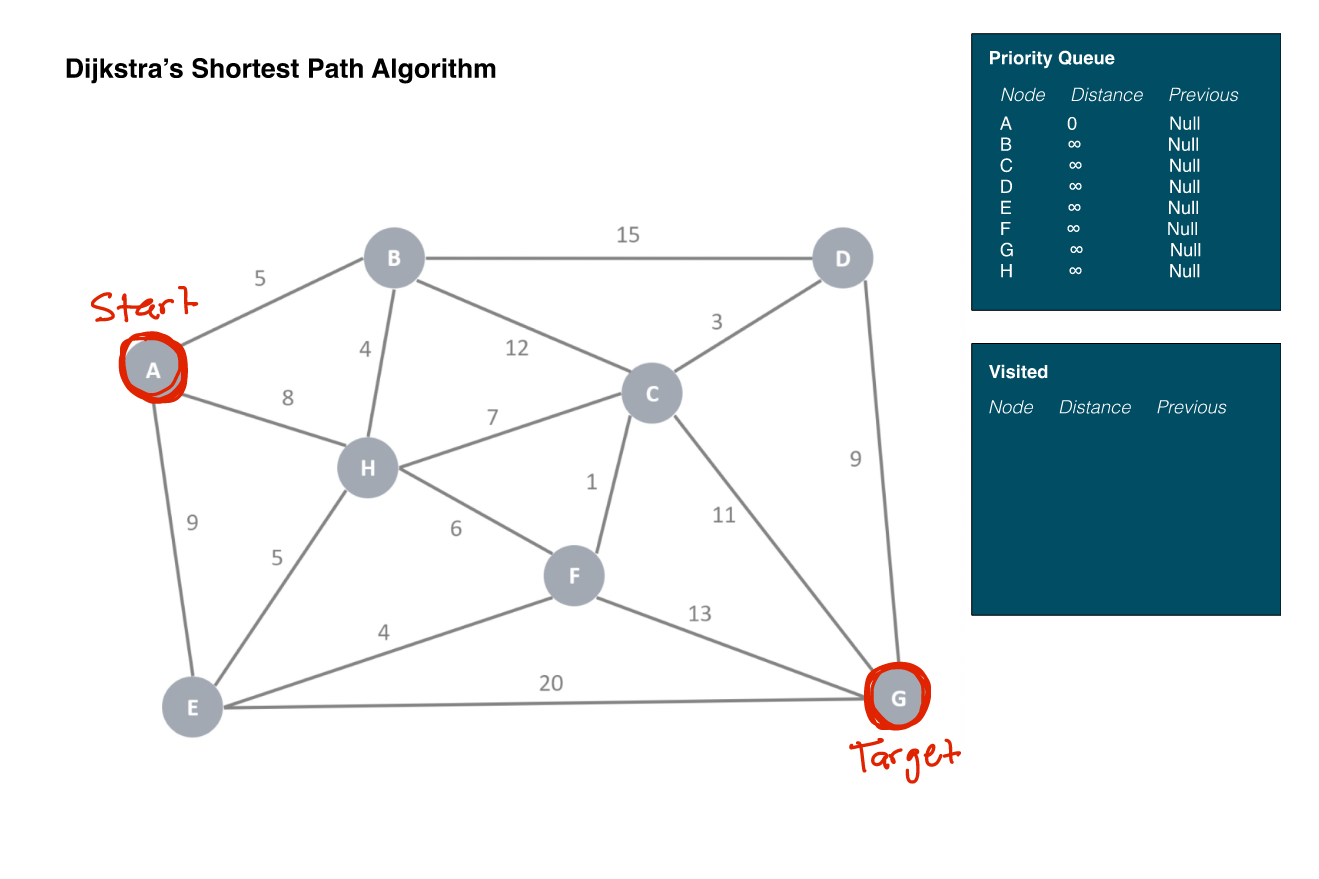

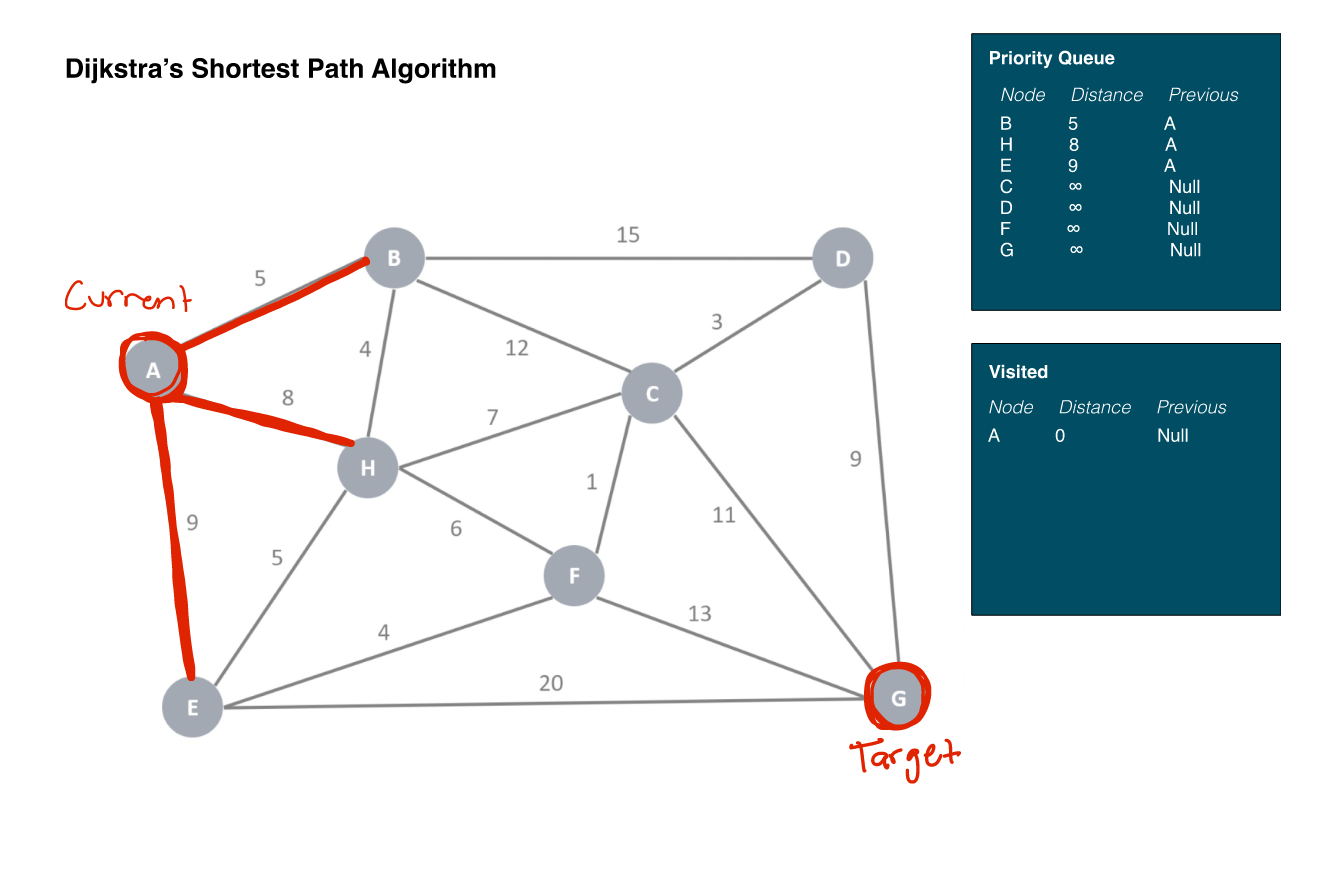

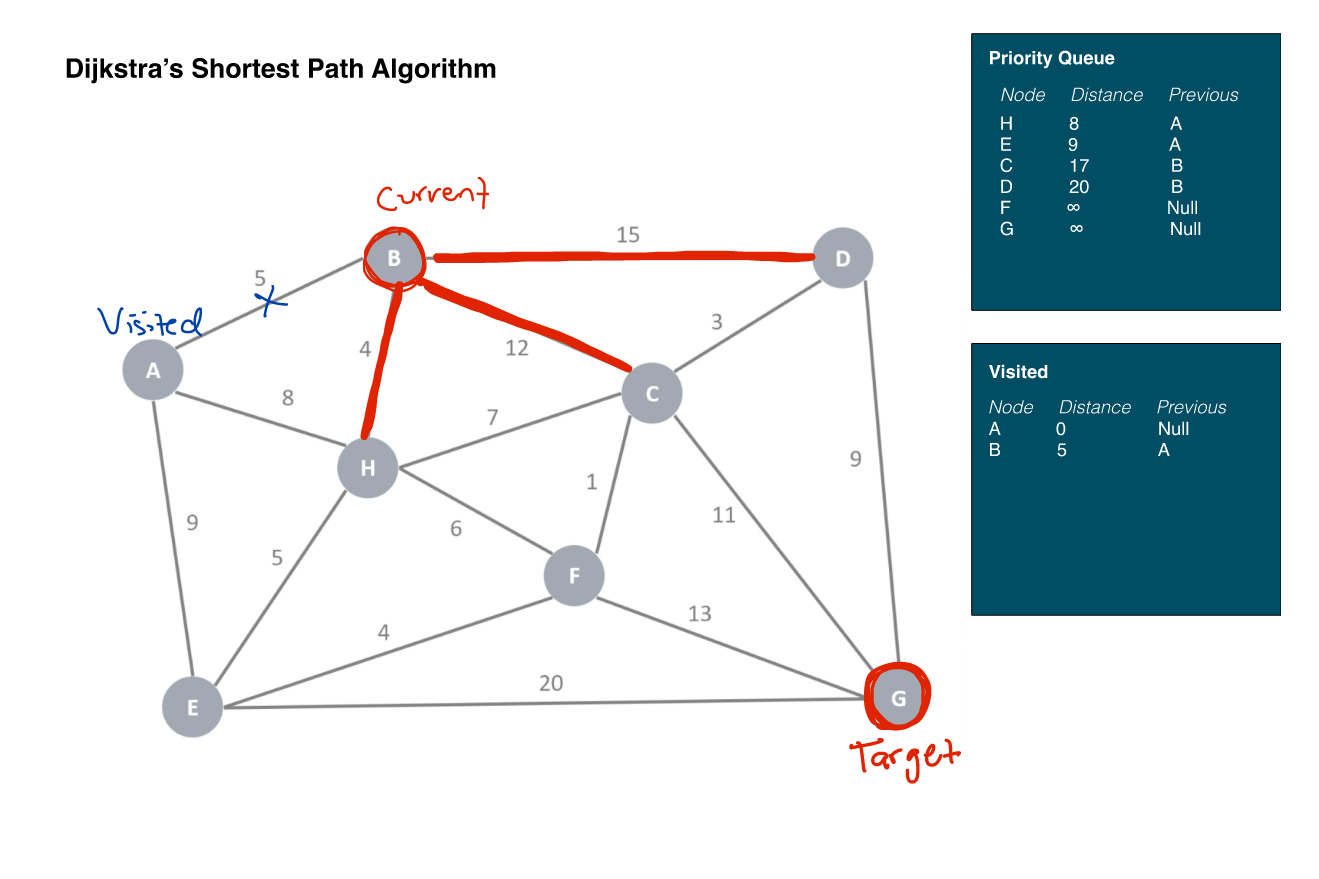

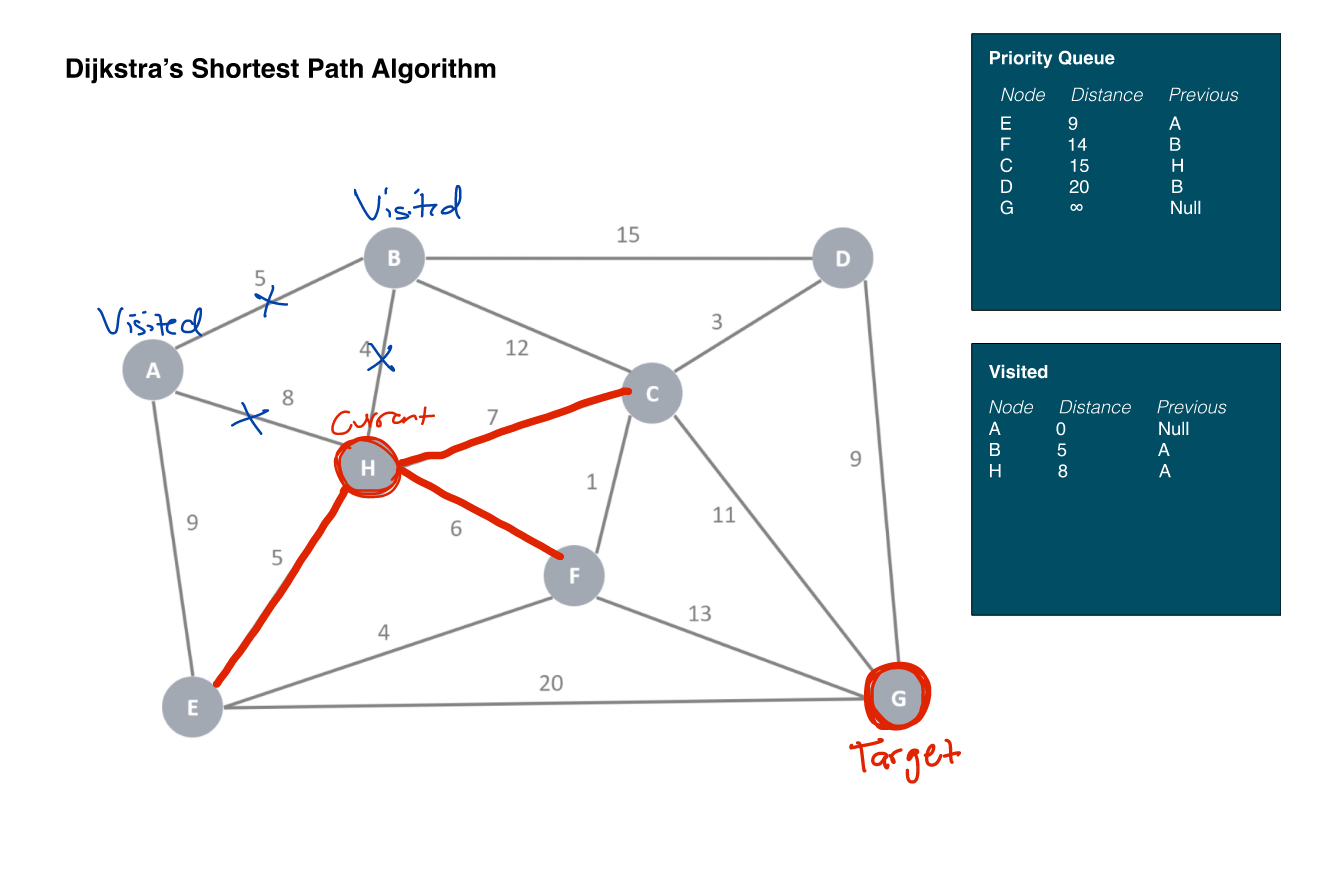

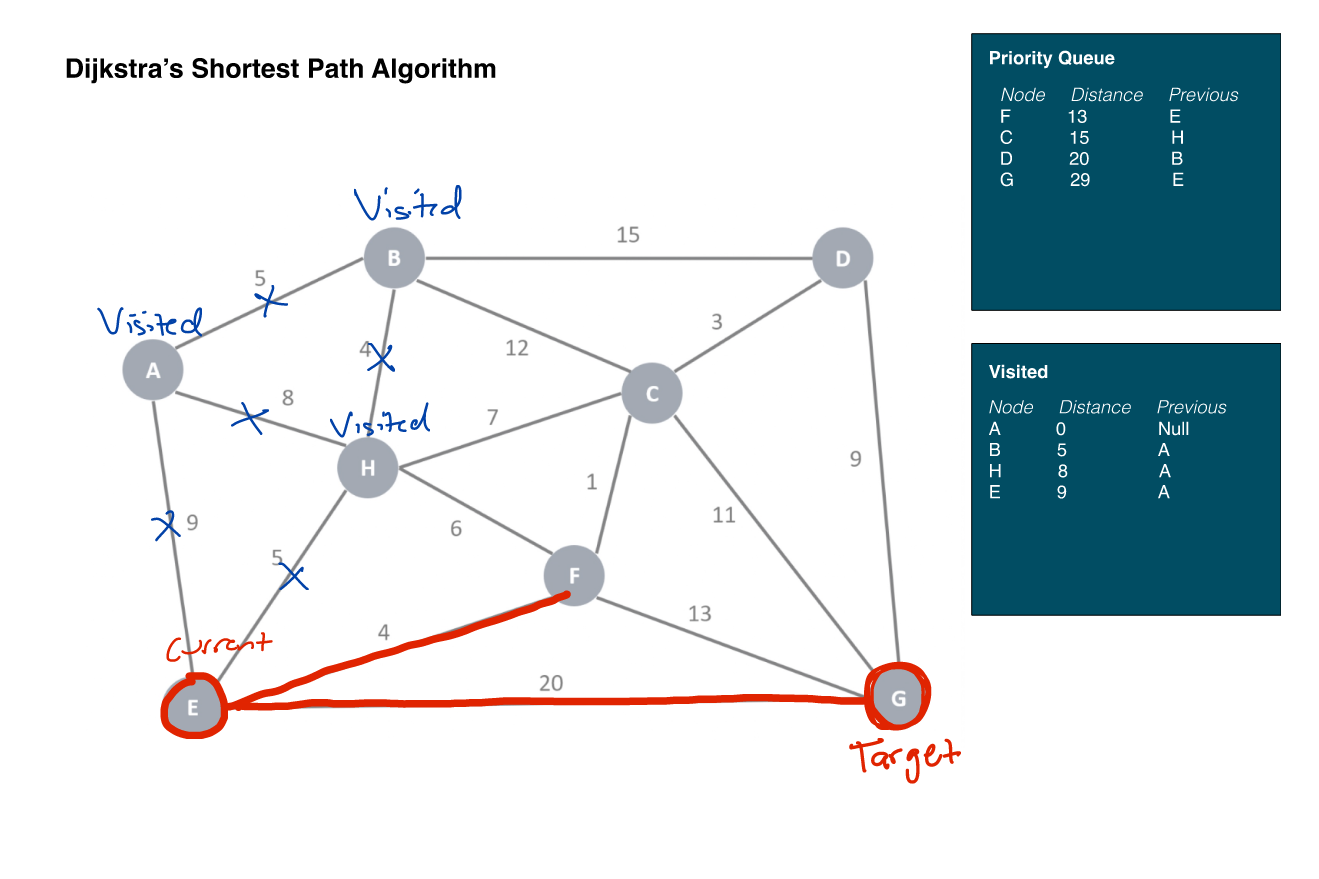

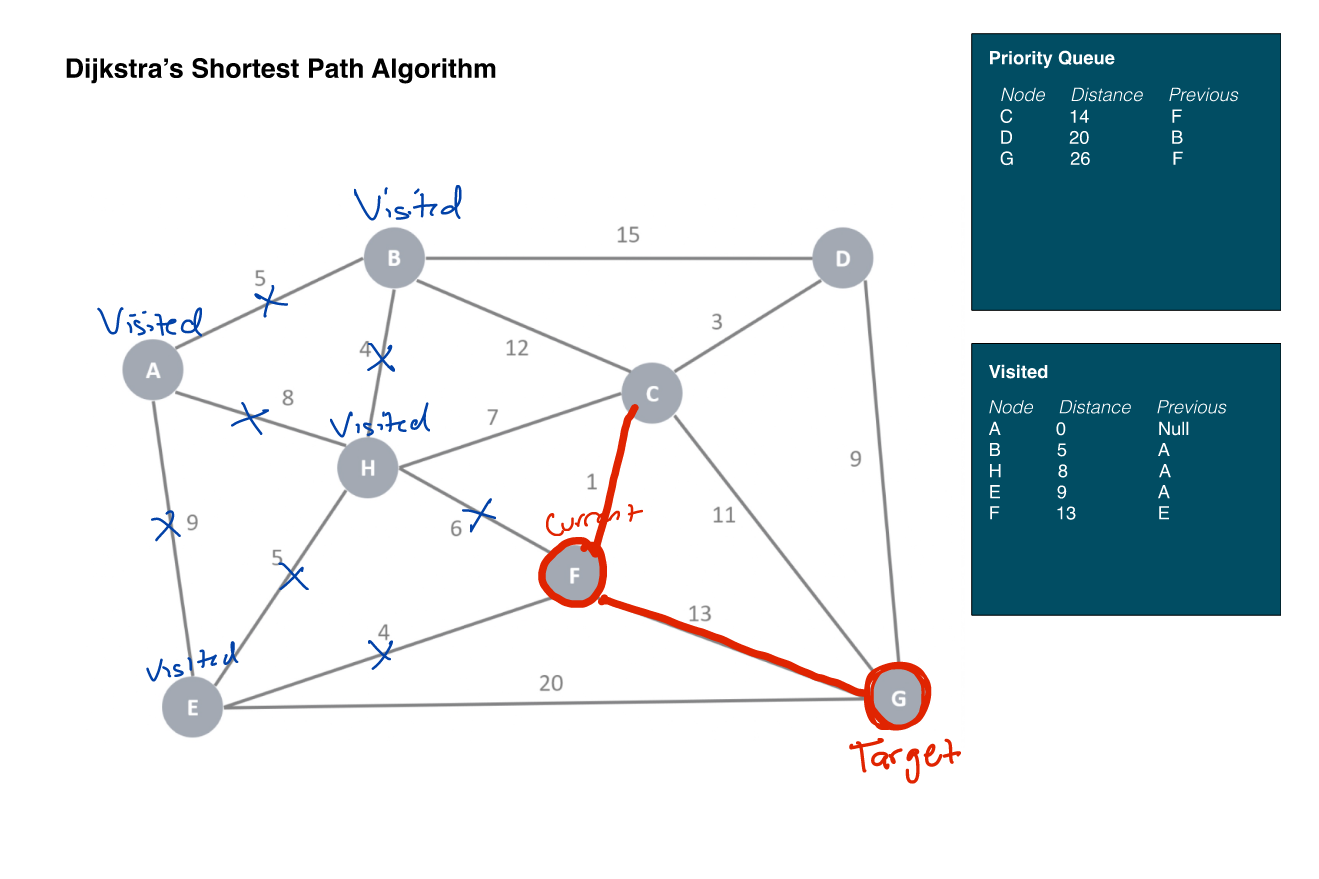

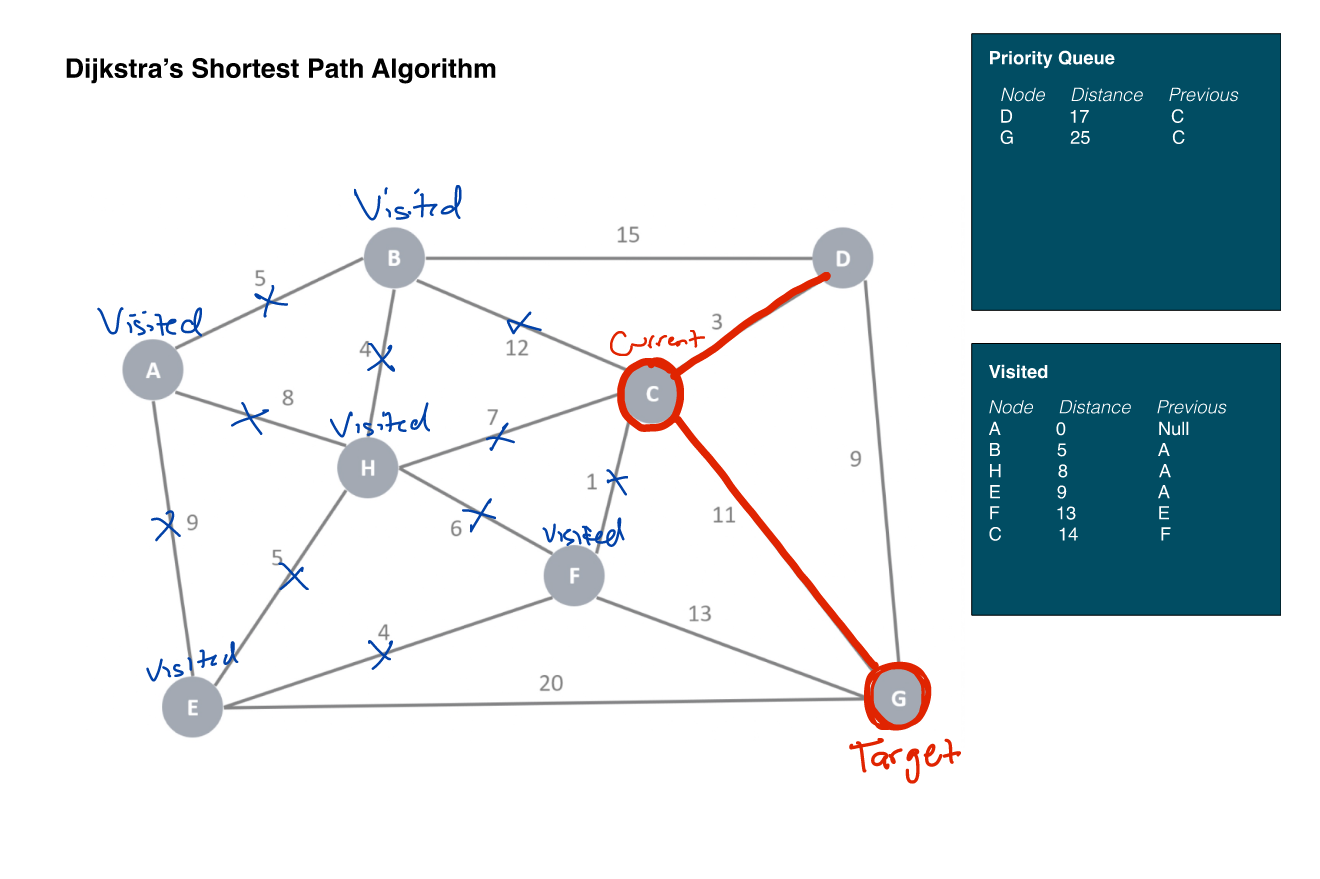

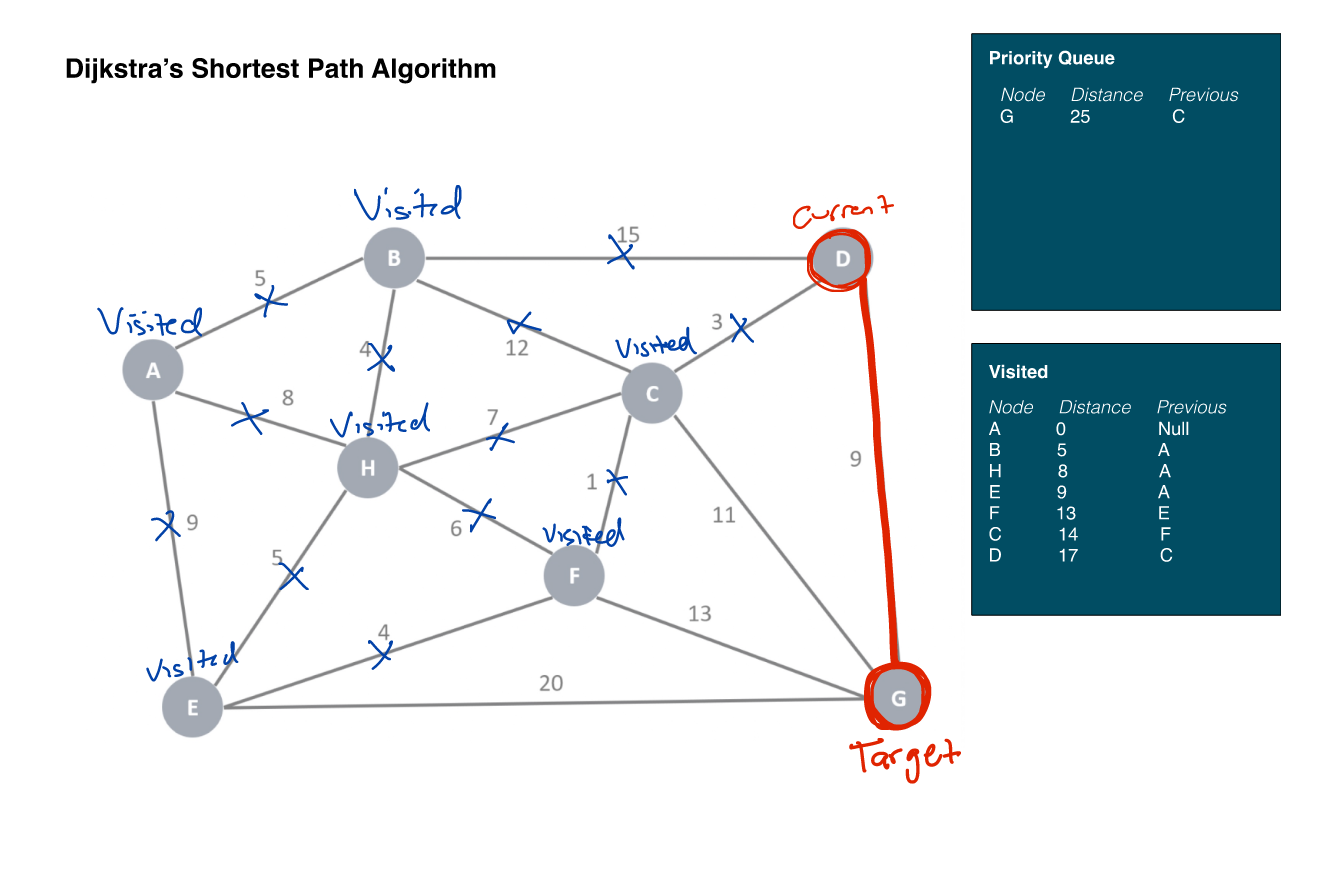

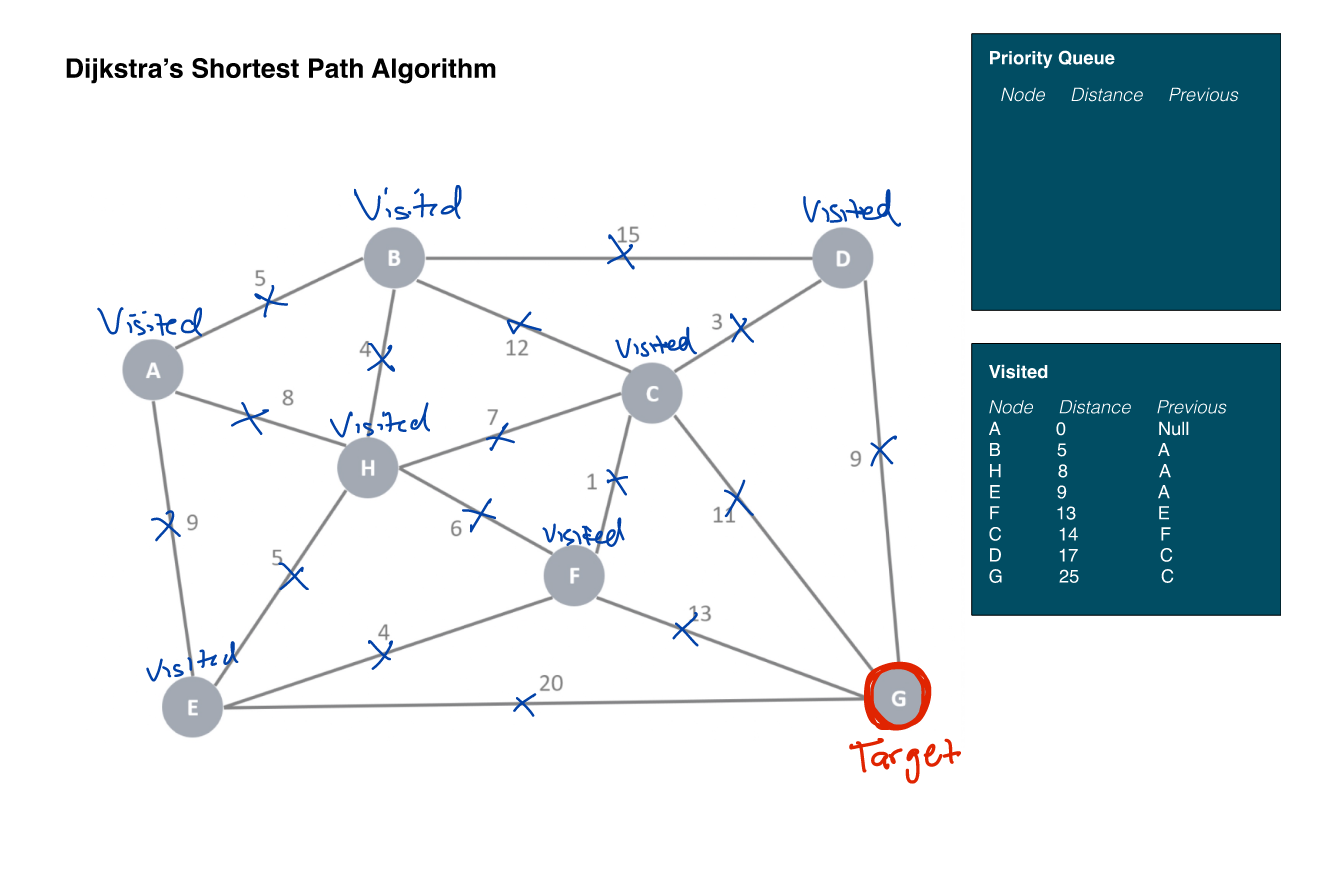

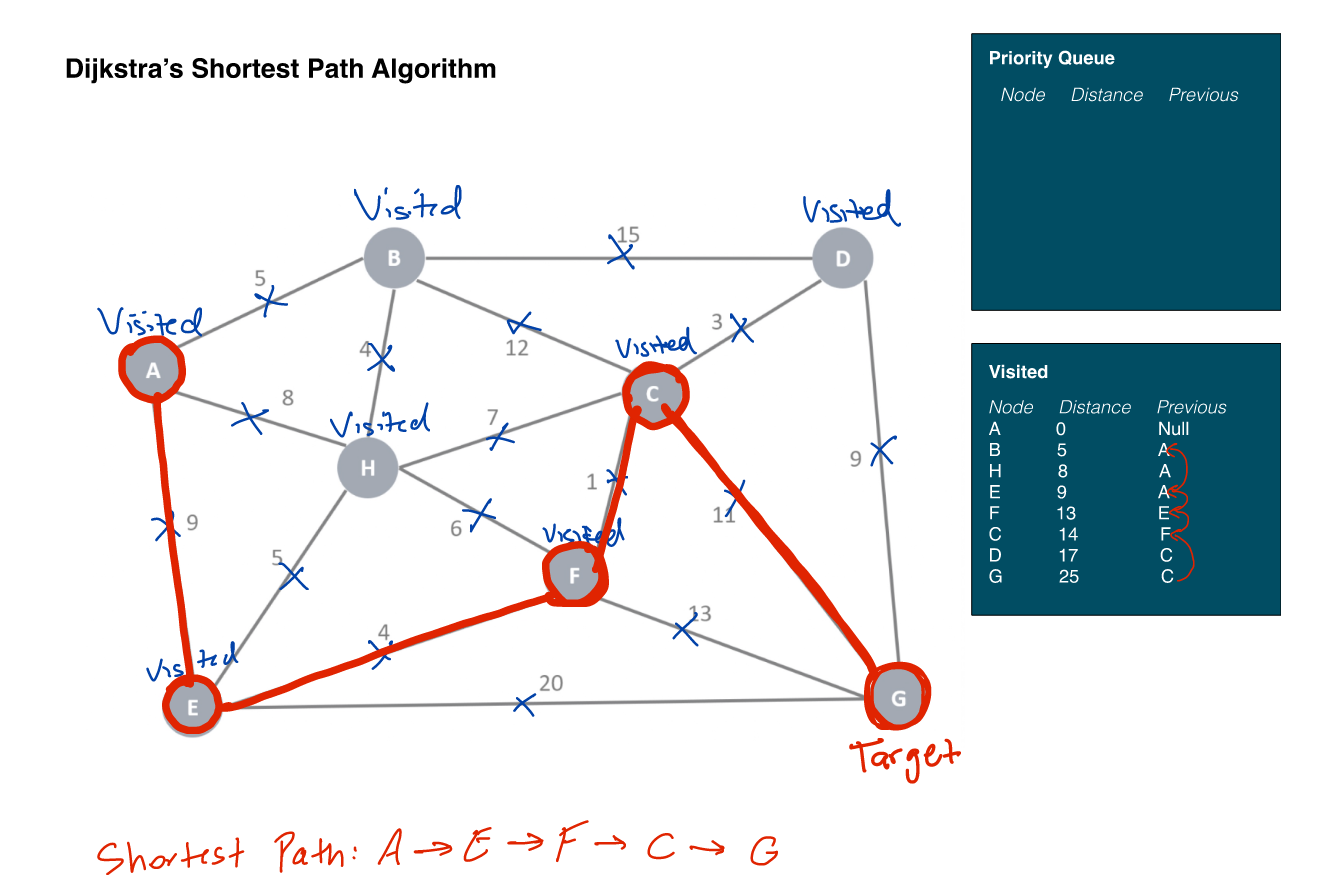

In [13]:
# Define the file path and create an empty array to store the images in
folderpath = "./Dijkstra's Images"
image_paths = []

# Get all the images from the "./Dijkstra's Images" folder
for filename in os.listdir(folderpath):
    if filename.endswith(".png"):
        image_paths.append(os.path.join(folderpath, filename))

# Loop over the list and display each image
for image_path in image_paths:
    # Create an Image object with the path or URL of the image
    image = Image(filename=image_path, width=700)
    # Display the image in the notebook
    display(image)


The final path is constructed after we reach the target node. In this case, by the time we reach G, there is no other node in the priority queue. At this point we can simply trace G's path back to A by going to the entry in the Visited list that the Previous node points to. The final path is A → E → F → C → G with a distance of 25.

### **2.3 Student Graph and Dijkstra's Implementation**

The next step is to verify the results of the shortest path algorithm. The first way we did this was using our own implementation of Dijkstra's, which can be found in the imported shortest_path.py module. Our implementation uses a class Dijkstra, which inherits from a base class, ShortestPathBase. The Dijkstra class creates its own implementation of the Priority Queue, which stores each of the nodes being considered as a next step, their known distance from the origin (which starts off as infinity), and the previous node in their path from the origin. To illustrate its functionality, we will first solve for the shortest path between A and G, printing the current status of the Priority Queue and Visited List at every step.

In [5]:
# Create an instance of the Dijkstra class, with the log value set to True
d = Dijkstra(my_graph, 'A', 'G', log=True)
# Print the result of the shortest_path
print("Shortest Path:", d.shortest_path)

Step 1
+------------------+----------------+
| Priority Queue   | Visited List   |
+==================+================+
| (A, 0, A)        |                |
+------------------+----------------+
| (B, inf, None)   |                |
+------------------+----------------+
| (H, inf, None)   |                |
+------------------+----------------+
| (E, inf, None)   |                |
+------------------+----------------+
| (C, inf, None)   |                |
+------------------+----------------+
| (D, inf, None)   |                |
+------------------+----------------+
| (G, inf, None)   |                |
+------------------+----------------+
| (F, inf, None)   |                |
+------------------+----------------+

Step 2
+------------------+----------------+
| Priority Queue   | Visited List   |
+==================+================+
| (B, 5, A)        | (A, 0, A)      |
+------------------+----------------+
| (H, 8, A)        |                |
+------------------+---------------

Now that we have seen the evolution of the Priority Queue and Visited List, we will simply calculate the shortest path from A to each node. The code below instantiates a Dijkstra class for each target node and then calculates each of the shortest paths and distances.

In [6]:
for target in my_graph.nodes:
    # Loop through each node that is not A, the start node
    if target != 'A':
        d = Dijkstra(my_graph, 'A', target)
        # Print the nodes along the shortest path
        print("\nShortest path between", 'A', "and", target, ":", d.shortest_path)
        # Print the distance
        print("Distance: ", d.shortest_distance)


Shortest path between A and B : ['A', 'B']
Distance:  5

Shortest path between A and H : ['A', 'H']
Distance:  8

Shortest path between A and E : ['A', 'E']
Distance:  9

Shortest path between A and C : ['A', 'E', 'F', 'C']
Distance:  14

Shortest path between A and D : ['A', 'E', 'F', 'C', 'D']
Distance:  17

Shortest path between A and G : ['A', 'E', 'F', 'C', 'G']
Distance:  25

Shortest path between A and F : ['A', 'E', 'F']
Distance:  13


### **2.4 Verifying with NetworkX**

The second way we verified the results of the shortest path algorithm was to use the NetworkX library, which is used to visualize and analyze networks. We will be using the graph defined in the Introduction to re-verify our results for the shortest-path algorithm.

#### Get and Draw Dijkstra's Shortest Path between A and Every Other Node

The NetworkX library comes with its own implementation of the shortest_path algorithm. We will use the shortest_path function to identify the nodes in the shortest path, the shortest_path_length function to get the length, and the NetworkX concept of a subgraph to overlay the shortest path on top of the existing graph. This allows us to see the shortest path between two nodes in the context of the whole network.


Shortest path between A and B : ['A', 'B']
Distance:  5


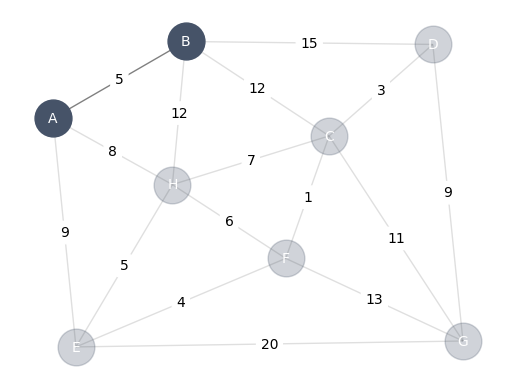


Shortest path between A and C : ['A', 'E', 'F', 'C']
Distance:  14


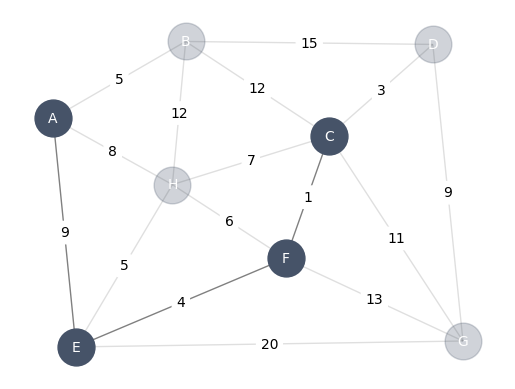


Shortest path between A and D : ['A', 'E', 'F', 'C', 'D']
Distance:  17


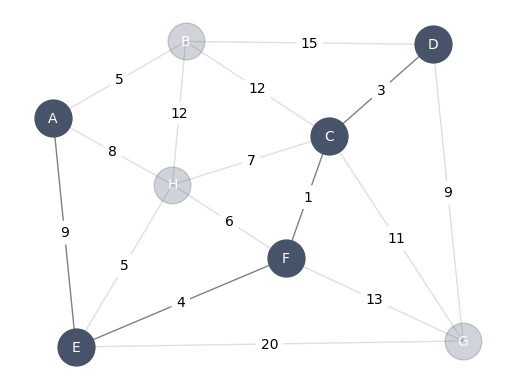


Shortest path between A and E : ['A', 'E']
Distance:  9


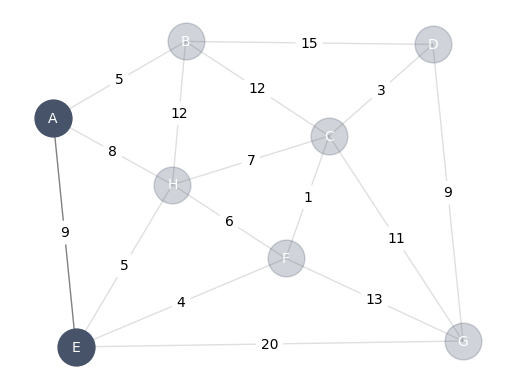


Shortest path between A and F : ['A', 'E', 'F']
Distance:  13


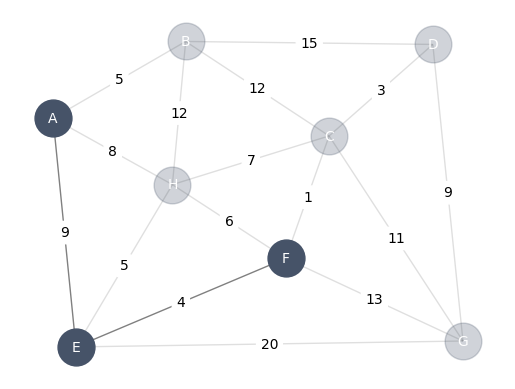


Shortest path between A and G : ['A', 'E', 'F', 'C', 'G']
Distance:  25


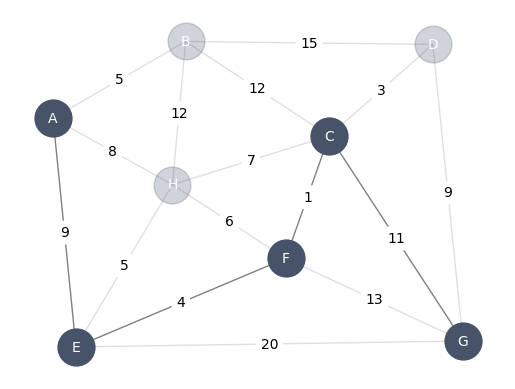


Shortest path between A and H : ['A', 'H']
Distance:  8


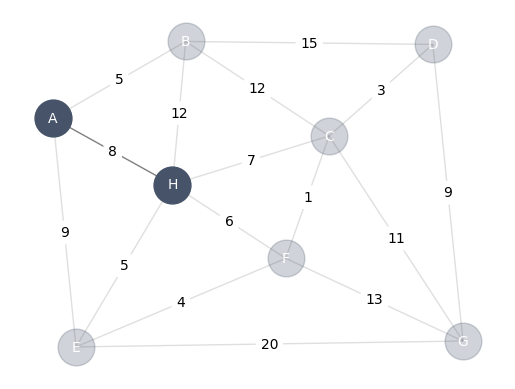

In [7]:
for target in nxx_graph.nodes:
    if target != 'A':
        # Get the shortest path between the source and target
        path = nx.shortest_path(nxx_graph, 'A', target, weight='weight', method='dijkstra')
        length = nx.shortest_path_length(nxx_graph, 'A', target, weight='weight', method='dijkstra')
        
        # Use the networkX_util module to print info for each shortest path
        nxu.print_shortest_path_info('A', target, path, length)
        # Use the networkX_util module to display the graph for each shortest path
        nxu.draw_shortest_path(nxx_graph, pos, path)

        plt.axis("off")
        plt.show()

### **2.5 Running Analysis**

Dijkstra's shortest path algorithm is a highly efficient approach to finding the optimal route along a graph with weighted edges. It optimizes computation by moving the highest priority, or most likely to succeed paths, to the top of the Priority Queue (which is not technically a queue), and does not touch nodes which are unlikely to be on the shortest path. The example graph we've traversed allows us to watch the path readjust as it finds better options, and backtrack when there is a path that is more likely to be the best path. It successfully finds routes where the overall weight of the path is lower, even if it means more hops, and can stop processing nodes once it's checked the unvisited neighbors of the target node. It is an efficient algorithm, and it is easy to see why it would be used on large scale systems like internet networks to find optimal routes between nodes.  
    
## 3.0 A\* Algorithm

The A\* Shortest path algorithm is a similar algorithm to Dijkstra's, with one key difference: it uses a heuristic measure which is meant to give the algorithm a shortcut to finding the closest path. In a graph where the position of nodes represents their physical location, such as a navigation system, this heuristic is often distance to the destination. However, this heuristic could be any value that provides insight into whether or not we are getting closer to the destination. A well calibrated heuristic addresses the problem the can sometimes arise in Dijkstra's algorithm where the order of nodes in the queue leads us to checking nodes that are getting further and further from the destination node, though the weights of the individual edges on the path being constructed are quite short. To test this algorith, we use the x,y coordinates of the nodes on the graph.

### **3.1 The Algorithm**

#### Pseudocode
***
**Algorithm 2:** A\* Algorithm for Finding the Shortest Path Between 2 Nodes
***
**Function:** shortest_path(G, s, e)  
**Input:** *G*, a graph, *s*, a start point, and *e*, and end point  
**Output:** the shortest path between a and e  
<span style="font-size:10px;">1:</span> $priority\_queue$:  ($distance$ ← $0$ for $s$, $∞$ for all other nodes; $heurisitc\_distance$ ← $distance$ + $euclidian\_distance\_to\_e$)  
<span style="font-size:10px;">2:</span> $visited ←$ empty list  
<span style="font-size:10px;">3:</span> $current ← a$  
<span style="font-size:10px;">4:</span> **while** $current ≠ e$  
<span style="font-size:10px;">5:        </span> $unvisited\_neighbors ← neighbors\_of\_current - visited$  
<span style="font-size:10px;">6:        </span> **for each** $neighbor$  
<span style="font-size:10px;">7:                </span> **if** $distance + euclidian\_distance\_to\_e < listed\_distance\_to\_neighbor + euclidian\_distance\_to\_e$  
<span style="font-size:10px;">8:                        </span> $distance ← distance\_to\_neighbor$; $heuristic ← euclidian\_distance\_to\_e + distance\_to\_neighbor$  
<span style="font-size:10px;">9:                </span> **append** $visited ← current$  
<span style="font-size:10px;">10:        </span> $current ← next\_in\_priority\_queue$  
<span style="font-size:10px;">11:</span> **end while**  
<span style="font-size:10px;">12:</span>  **return** $result$

### **3.2 Hand Drawn Algorithm**
Once again, before executing any of the programmed versions of the code, we have drawn out the steps of the path finding algorithm, which calculates the shortest path based on the weights of the edges between nodes, and their physical positions on the graph. Below, you can see the Priority Queue and the Visited list at each step of the algorithm, this time with the added Heuristic value, which is based not only on the length of the path to the node, but to the distance between the node and the target node. For each step, we've also indicated which node is currently being visited, as well as the unvisited neighbors it is considering. The order in which it visits nodes is determined by the priority queue, which is updated to reflect the shortest path to each node after each visit.

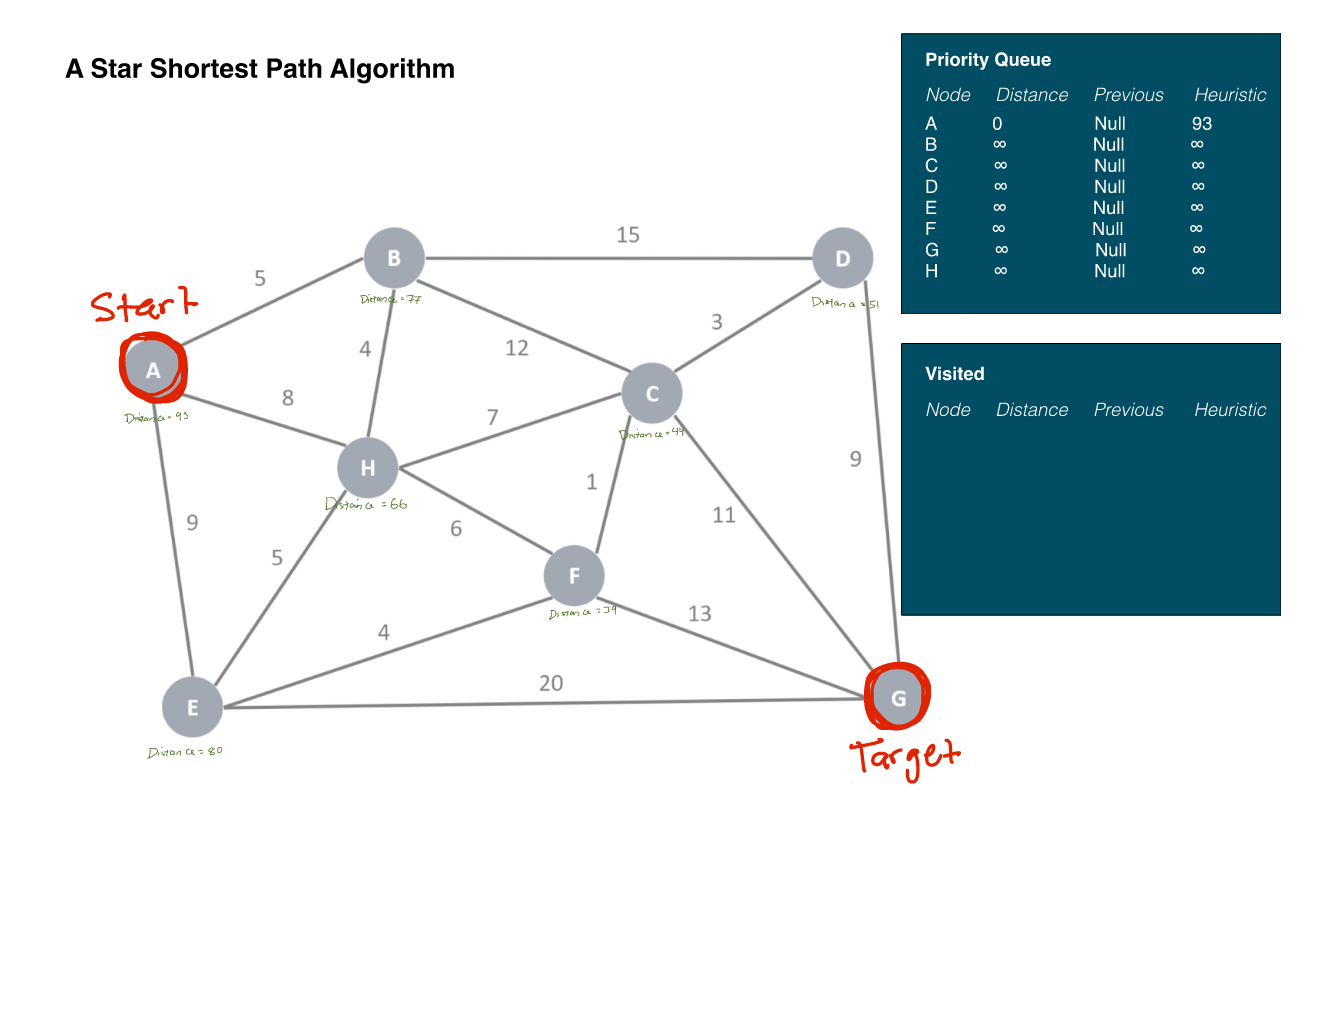

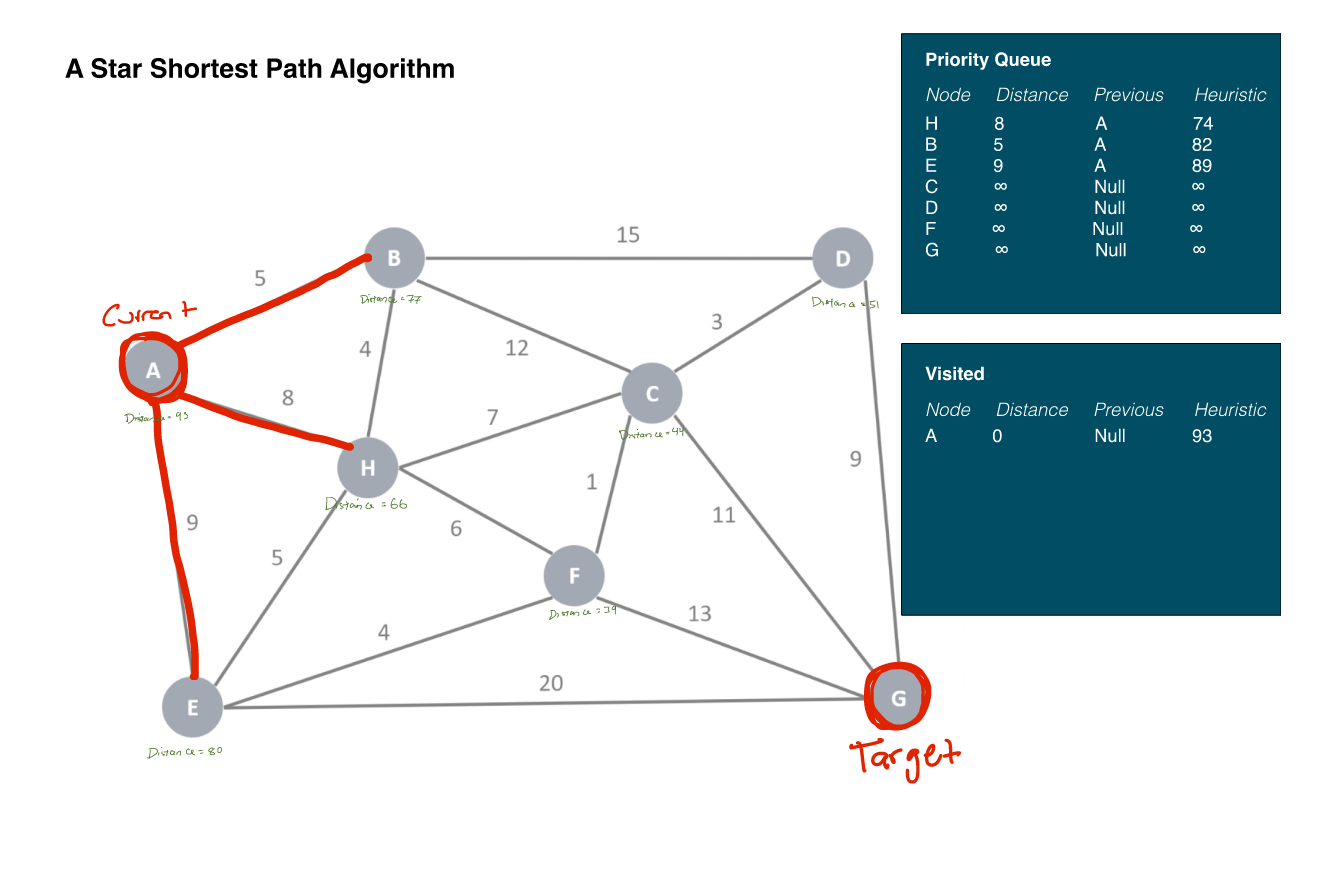

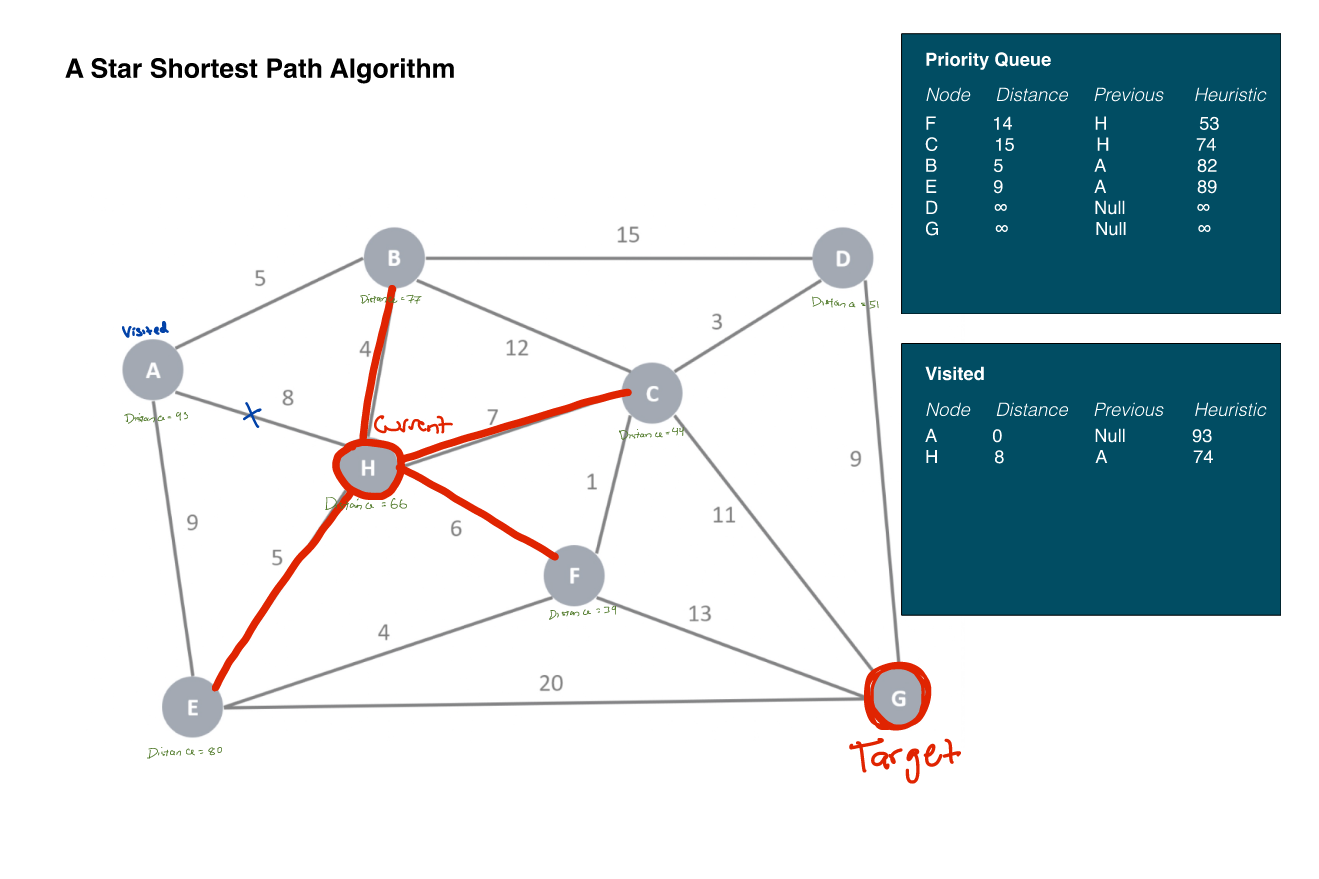

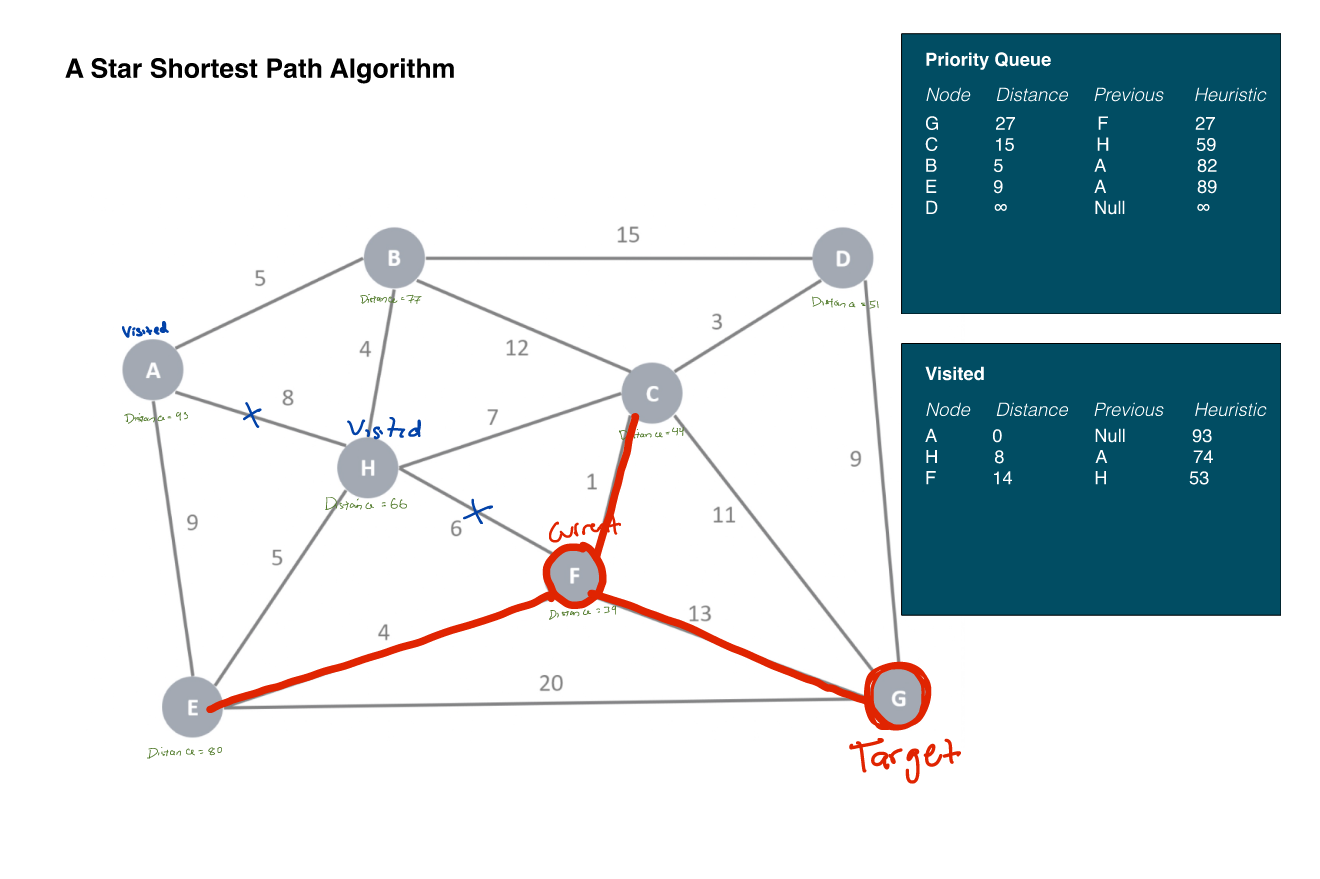

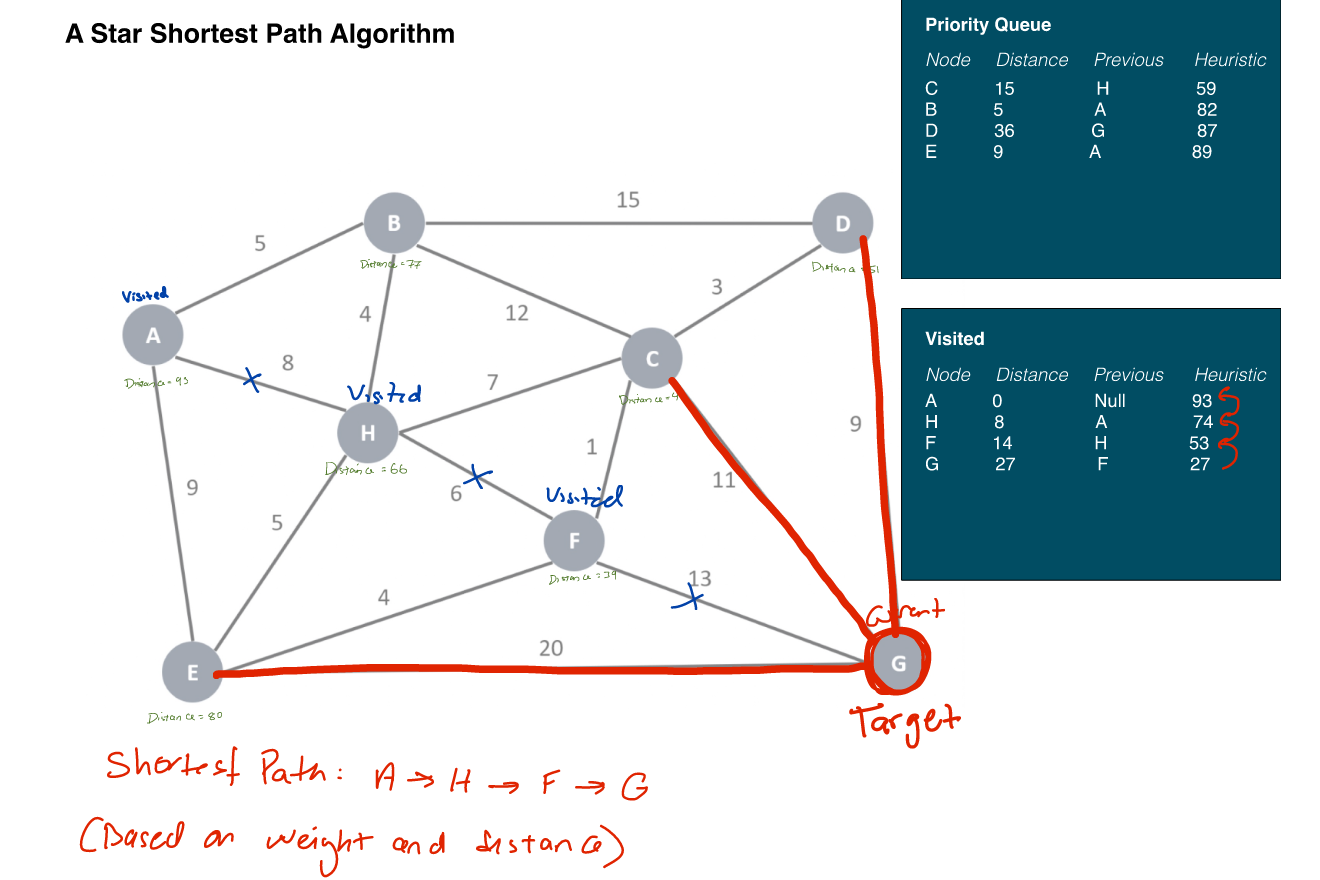

In [8]:
# Define the file path and create an empty array to store the images in
folderpath = "./AStar Images"
image_paths = []

# Get all the images from the "./Dijkstra's Images" folder
for filename in os.listdir(folderpath):
    if filename.endswith(".png"):
        image_paths.append(os.path.join(folderpath, filename))

# Loop over the list and display each image
for image_path in image_paths:
    # Create an Image object with the path or URL of the image
    image = Image(filename=image_path, width=500)
    # Display the image in the notebook
    display(image)

### **3.3 Student Graph and A Star Implementation**

The next step is to verify the results of the shortest path algorithm. The first way we did this was using our own implementation of the A Star algorithm, which can be found in the imported shortest_path.py module. Our implementation uses a class A_Star, which inherits from a base class, ShortestPathBase. The A_Star class creates its own implementation of the Priority Queue, which stores each of the nodes being considered as a next step, their known distance from the origin (which starts off as infinity), the previous node on the path from the origin, and the "Heuristic" which is a sum of the length of the path and the euclidian distance between it and the target node. To illustrate its functionality, we will first solve for the shortest path between A and G, printing the current status of the Priority Queue and Visited List at every step.

In [9]:
# Create an instance of the A_Star class, with the log value set to True
a = A_Star(my_graph, 'A', 'G', log=True)
# Print the result of the shortest_path
print("Shortest Path:", a.shortest_path)

Step 1
+---------------------+----------------+
| Priority Queue      | Visited List   |
+=====================+================+
| (A, 0, A, 93.0)     |                |
+---------------------+----------------+
| (B, inf, None, inf) |                |
+---------------------+----------------+
| (H, inf, None, inf) |                |
+---------------------+----------------+
| (E, inf, None, inf) |                |
+---------------------+----------------+
| (C, inf, None, inf) |                |
+---------------------+----------------+
| (D, inf, None, inf) |                |
+---------------------+----------------+
| (G, inf, None, inf) |                |
+---------------------+----------------+
| (F, inf, None, inf) |                |
+---------------------+----------------+

Step 2
+---------------------+-----------------+
| Priority Queue      | Visited List    |
+=====================+=================+
| (H, 8, A, 74.0)     | (A, 0, A, 93.0) |
+---------------------+---------------

Now that we have seen the evolution of the Priority Queue and Visited List, and verified that it behaves as expected, we will simply calculate the shortest path from A to each node. The code below instantiates an A_Star class for each target node and then calculates each of the shortest paths and distances.

In [10]:
for target in my_graph.nodes:
    a = A_Star(my_graph, 'A', target)

    print("\nShortest path between", 'A', "and", target, ":", a.shortest_path)
    print("Distance: ", a.shortest_distance)


Shortest path between A and A : ['A']
Distance:  0

Shortest path between A and B : ['A', 'B']
Distance:  5

Shortest path between A and H : ['A', 'H']
Distance:  8

Shortest path between A and E : ['A', 'E']
Distance:  9

Shortest path between A and C : ['A', 'B', 'C']
Distance:  17

Shortest path between A and D : ['A', 'B', 'D']
Distance:  20

Shortest path between A and G : ['A', 'H', 'F', 'G']
Distance:  27

Shortest path between A and F : ['A', 'H', 'F']
Distance:  14


### **3.4 - Verifying with NetworkX**

Like we did for Dijkstra's, we will once again verify the results of the shortest path algorithm using the NetworkX library. Once again, we will use the graph defined in the Introduction to re-verify our results for the shortest-path algorithm.

#### Get and Draw A* Shortest Path between A and Every Other Node

The NetworkX library comes with its own implementation of the AStar shortest_path algorithm. We will use the astar_path function to identify the nodes in the shortest path, the astar_path_length function to get the length, a heuristic function that uses position of the nodes to calculate the heuristic property of the graph, and the NetworkX concept of a subgraph to overlay the shortest path on top of the existing graph. This allows us to see the shortest path between two nodes in the context of the whole network.


Shortest path between A and B : ['A', 'B']
Distance:  5


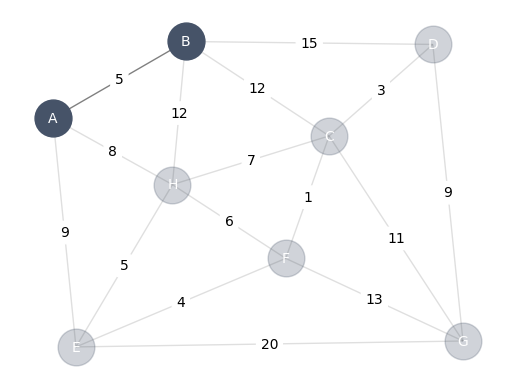


Shortest path between A and C : ['A', 'B', 'C']
Distance:  17


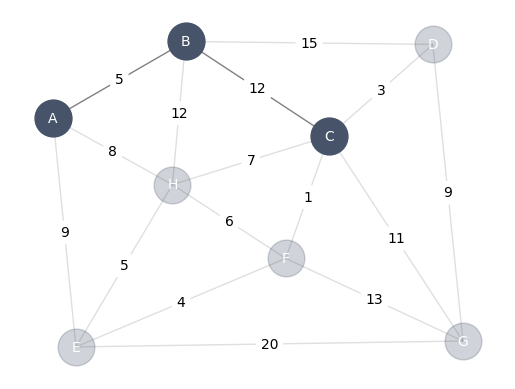


Shortest path between A and D : ['A', 'B', 'D']
Distance:  20


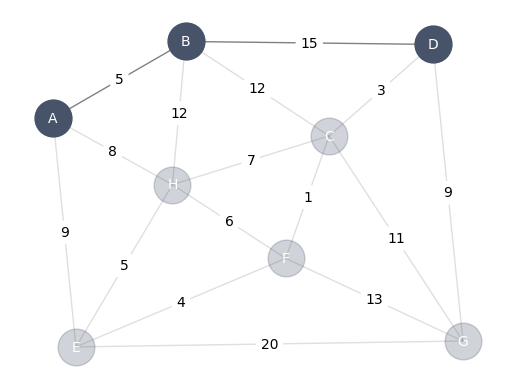


Shortest path between A and E : ['A', 'E']
Distance:  9


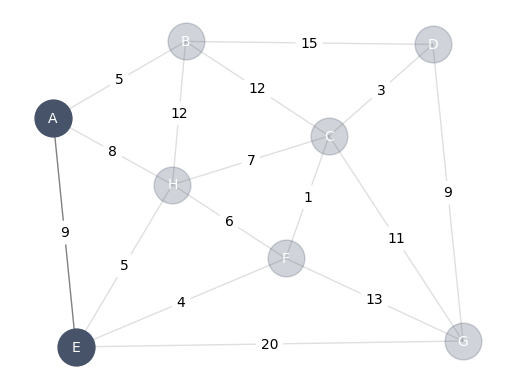


Shortest path between A and F : ['A', 'H', 'F']
Distance:  14


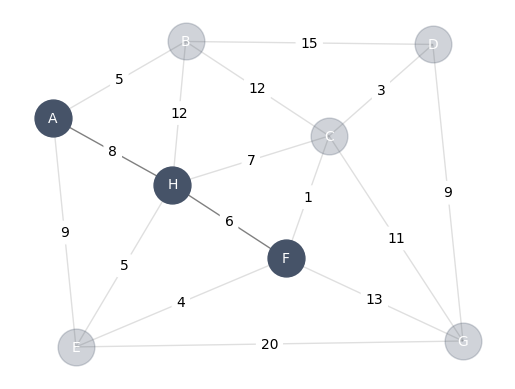


Shortest path between A and G : ['A', 'H', 'F', 'G']
Distance:  27


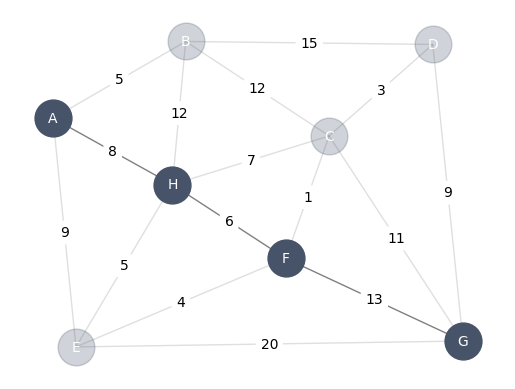


Shortest path between A and H : ['A', 'H']
Distance:  8


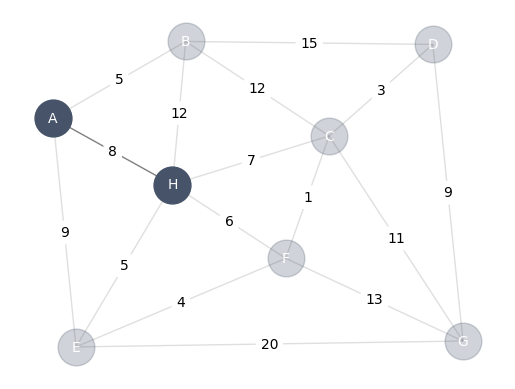

In [11]:
# Define the heuristic function to be used to supplement the weights of the graph edges
def heuristic(node, target, graph=nxx_graph):
    # Calculate heuristic distance between node and target
    current_position = graph.nodes[node]['pos']
    target_position = graph.nodes[target]['pos']
    distance = math.sqrt((current_position[0] - target_position[0])**2 + (current_position[1] - target_position[1])**2)
       
    return distance

# Loop through the nodes of the graph to get the shortest path for each
for target in nxx_graph.nodes:
    if target != 'A':
        # Get the shortest path between the source and target
        path = nx.astar_path(nxx_graph, 'A', target, heuristic=heuristic, weight='weight')
        length = nx.astar_path_length(nxx_graph, 'A', target, heuristic=heuristic, weight='weight')
        
        # Use the networkX_util module to print info for each shortest path
        nxu.print_shortest_path_info('A', target, path, length)
        # Use the networkX_util module to display the graph for each shortest path
        nxu.draw_shortest_path(nxx_graph, pos, path)

        plt.axis("off")
        plt.show()

### **3.5 Running Analysis**

The A* shortest path algorithm is another highly efficient approach to finding the optimal route along a graph with weighted edges. Unlike Dijkstra's it does not work with all graphs, and requires a heuristic of some kind to guide the graph traversal. In the case of our graph, we used the x and y coordinates of each node to determine the distance to the target, and used the distance as the heuristic. This decision gave meaning to the location of the nodes which was not necessarily there, and in a scenario where the location of the nodes is not indicative of length of the path, this would not be useful. The nodes were on a coordinate system that spanned from 0 to 100 in the x direction and 0 to 60 in the y, so the distances ranged from 40 to 90, vastly overshadowing the weights of the edges. In this case, the shortest paths that were calculated essentially represented the path with the shortest Euclidean distance from A to all of the other nodes. 

## 4.0 Conclusion

In this study, we explored the efficiency and effectiveness of two shortest path algorithms, Dijkstra's and A*, in finding the optimal route between two nodes in a graph with weighted edges. By manually executing these algorithms on paper and implementing our own versions, we gained a deeper understanding of the mechanics and requirements of these algorithms, and were able to verify the correctness of our implementations using the NetworkX library.  

The importance of a well-calibrated heuristic in the A* algorithm was highlighted during our experiments. Our chosen heuristic, which was based on the Euclidean distance between nodes, greatly overshadowed the weights of the edges in the graph. This resulted in the shortest paths essentially representing the paths with the shortest Euclidean distances from the start node to all other nodes, rather than truly representing the shortest path based on edge weights. In a future study, we would explore the use of alternative heuristics, such as alphabetical proximity of the node names or come up with a scenario for the graph to represent and use a domain-specific heuristic. This would allow us to better understand their impact on the performance and accuracy of the A* algorithm.  

Our investigation into Dijkstra's and A* shortest path algorithms provided valuable insights into their functionality, efficiency, and limitations. The experiments conducted in this study not only demonstrated the correctness of our implementations but also revealed the crucial role played by a well-chosen heuristic in the A* algorithm. By continuing to refine and experiment with different heuristics, we can further optimize the A* algorithm's performance, making it an even more powerful tool for solving shortest path problems in a variety of applications.

### References

- <a href="https://www.amazon.com/Structures-Algorithms-Python-Michael-Goodrich/dp/1118290275">"Data Structures & Algorithms in Python", Goodrich, Tamassia, and Goldwasser </a>
- <a href="https://www.youtube.com/watch?v=GazC3A4OQTE">Dijkstra's Algorithm - Computerphile</a> & <a href="https://www.youtube.com/watch?v=ySN5Wnu88nE">A* (A Star) Search Algorithm - Computerphile </a>
- <a href="https://networkx.org/"> NetworkX Documentation </a>
- <a href="https://docs.python.org/3/library/unittest.html"> UnitTest Documentation </a>
- <a href="https://stackoverflow.com/questions/37895781/unable-to-run-unittests-main-function-in-ipython-jupyter-notebook"> StackOverflow Discussion on Unit Tests in Jupyter Notebook </a>

### Unit Tests

Import our unit test module, saved in graph_path_testing.py, and call the unittest.main method. This should run all of the tests defined in our graph_path_testing module and display the results in the notebook.

In [12]:
import unittest
import graph_path_testing

suite = unittest.TestLoader().loadTestsFromModule(graph_path_testing)
unittest.TextTestRunner(verbosity=2).run(suite)

test_adjacent (graph_path_testing.TestGraph.test_adjacent) ... ok
test_edges (graph_path_testing.TestGraph.test_edges) ... ok
test_is_empty (graph_path_testing.TestGraph.test_is_empty) ... ok
test_neighbors (graph_path_testing.TestGraph.test_neighbors) ... ok
test_nodes (graph_path_testing.TestGraph.test_nodes) ... ok
test_num_edges (graph_path_testing.TestGraph.test_num_edges) ... ok
test_num_nodes (graph_path_testing.TestGraph.test_num_nodes) ... ok
test_get_unvisited_neighbors (graph_path_testing.TestShortestPathAlgorithms.test_get_unvisited_neighbors) ... ok
test_graph_input_validation (graph_path_testing.TestShortestPathAlgorithms.test_graph_input_validation) ... ok
test_heuristic_calculation (graph_path_testing.TestShortestPathAlgorithms.test_heuristic_calculation) ... ok
test_initialize_priority_queue (graph_path_testing.TestShortestPathAlgorithms.test_initialize_priority_queue) ... ok
test_shortest_path_calculation (graph_path_testing.TestShortestPathAlgorithms.test_shortest_pa

<unittest.runner.TextTestResult run=12 errors=0 failures=0>